# **Programming for Data Analysis** - Harsha [20252236]





> CIS7031 - WRIT1



## **Depression and Anxiety data**



>**Analytical Question:** Predict the suicidal probability among the given dataset








---


## **Step 1:** Data collection and assembly





> **1.1   Importing all the packages required**






In [1]:
import pandas as pd #To work with more structured datasets
import matplotlib.pyplot as plt #To do visualizations
import seaborn as sns #To draw attractive and informative statistical diagram like heatmap
import numpy as np #To do statistical mathematical calculations
from sklearn import preprocessing #For predictive data analysis
from scipy import stats #Tools for statistical analysis

from sklearn.model_selection import train_test_split #For splitting train and test data
from sklearn import metrics #To check the accuracy

from sklearn.tree import DecisionTreeClassifier #Decision tree

from sklearn.neighbors import KNeighborsClassifier #K nearest neighbour

from sklearn.linear_model import LogisticRegression #Logistic regression

from sklearn import svm #support vector machine

import tensorflow as tf #Artificial neural network





> **1.2 Reading the Dataframe from the CSV file**






In [2]:
#Reading the CSV file CIS7031.csv as Suicidedf
Suicidedf = pd.read_csv('CIS7031.csv')

#Printing the first 10 rows of the csv
Suicidedf.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False






> **1.3   Studying the dataset**






In [3]:
#Using info to understand the information of the dataset
Suicidedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

*The dataset contains 19 columns with 783 entries. There are a mix of int, float and object datatype present in the dataset. There are null values in 10 columns, we could also see the labels of each column.*

In [4]:
#Using describe function to have an overview of statistical value of dataset
Suicidedf.describe()

,id,school_year,age,bmi,phq_score,gad_score,epworth_score
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,775.000000
mean,392.000000,2.277139,20.233716,23.420533,7.123883,6.810983,6.376774
std,226.176922,1.163633,1.767217,4.563630,4.426580,4.727352,3.996443
min,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,196.500000,1.000000,19.000000,20.989420,4.000000,3.000000,3.500000
50%,392.000000,2.000000,20.000000,23.140496,6.000000,6.000000,6.000000
75%,587.500000,3.000000,21.000000,25.519924,9.000000,9.000000,9.000000
max,783.000000,4.000000,31.000000,54.552668,24.000000,21.000000,32.000000


*The describe function only takes the numerical values into consideration. Here we could see the number of values, mean, standard deviation, percentiles and min-max values of each numerical columns.*

## **Step 2:** Data Analysis





> **2.1   Data preprocessing**













In [5]:
#Using isna function to understand the count of missing values
Suicidedf.isna().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

*The isna function along with sum function gives the number of missing values for each column. Here, we could see the dataset has very few missing values which could be either replaced or dropped*

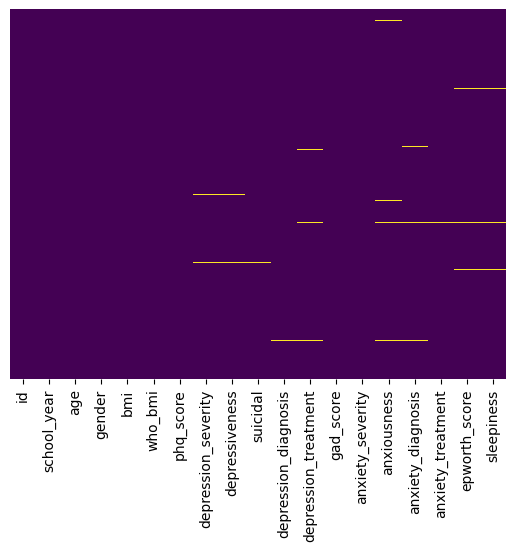

In [6]:
#Plotting the null values using heatmap
plt.figure()
sns.heatmap(Suicidedf.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [7]:
#Finding the percentage of missing values in each column
Suicidedf.isna().sum()/len(Suicidedf)*100

id                      0.000000
school_year             0.000000
age                     0.000000
gender                  0.000000
bmi                     0.000000
who_bmi                 0.000000
phq_score               0.000000
depression_severity     0.510856
depressiveness          0.383142
suicidal                0.127714
depression_diagnosis    0.127714
depression_treatment    0.510856
gad_score               0.000000
anxiety_severity        0.000000
anxiousness             0.766284
anxiety_diagnosis       0.510856
anxiety_treatment       0.255428
epworth_score           1.021711
sleepiness              1.021711
dtype: float64

*It can be seen that the highest percentage of missing values is 1%. Hence, replacing the missing values will be a better option rather than droping the null values*





> **2.1.1   Data Transformation**













*The data contains object class type with string values. These columns has null values as well. Using Label Encoder these columns can be converted to numeric columns*

In [8]:
#Droping all the row that contains null values
Suicidedf = Suicidedf[Suicidedf.who_bmi != 'Not Availble'] #Since Not available was a string
Suicidedf.dropna(subset = ['gender', 'who_bmi', 'depression_severity', 'anxiety_severity', 'epworth_score'], inplace = True)

<ipython-input-8-f5ea6b5698d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Suicidedf.dropna(subset = ['gender', 'who_bmi', 'depression_severity', 'anxiety_severity', 'epworth_score'], inplace = True)


In [9]:
Suicidedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    763 non-null    int64  
 1   school_year           763 non-null    int64  
 2   age                   763 non-null    int64  
 3   gender                763 non-null    object 
 4   bmi                   763 non-null    float64
 5   who_bmi               763 non-null    object 
 6   phq_score             763 non-null    int64  
 7   depression_severity   763 non-null    object 
 8   depressiveness        763 non-null    object 
 9   suicidal              763 non-null    object 
 10  depression_diagnosis  762 non-null    object 
 11  depression_treatment  761 non-null    object 
 12  gad_score             763 non-null    int64  
 13  anxiety_severity      763 non-null    object 
 14  anxiousness           759 non-null    object 
 15  anxiety_diagnosis     7

In [10]:
#Converting phq score to Normal to Severe
Suicidedf.loc[Suicidedf['phq_score'] <= 4, 'phq_score_edt'] = 'Normal' 
Suicidedf.loc[(Suicidedf['phq_score'] > 4) & (Suicidedf['phq_score'] <= 9), 'phq_score_edt'] = 'Mild'
Suicidedf.loc[(Suicidedf['phq_score'] > 9) & (Suicidedf['phq_score'] <= 14), 'phq_score_edt'] = 'Moderate'
Suicidedf.loc[(Suicidedf['phq_score'] > 14) & (Suicidedf['phq_score'] <= 19), 'phq_score_edt'] = 'Moderately severe'
Suicidedf.loc[(Suicidedf['phq_score'] > 19), 'phq_score_edt'] = 'Severe'

<ipython-input-10-09bca44d3ee4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Suicidedf.loc[Suicidedf['phq_score'] <= 4, 'phq_score_edt'] = 'Normal'


In [11]:
#Converting gad score to Normal to Severe
Suicidedf.loc[Suicidedf['gad_score'] <= 4, 'gad_score_edt'] = 'Normal'
Suicidedf.loc[(Suicidedf['gad_score'] > 4) & (Suicidedf['gad_score'] <= 9), 'gad_score_edt'] = 'Mild'
Suicidedf.loc[(Suicidedf['gad_score'] > 9) & (Suicidedf['gad_score'] <= 14), 'gad_score_edt'] = 'Moderate'
Suicidedf.loc[(Suicidedf['gad_score'] > 14), 'gad_score_edt'] = 'Severe'
Suicidedf['gad_score_edt']

<ipython-input-11-1c10540675d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Suicidedf.loc[Suicidedf['gad_score'] <= 4, 'gad_score_edt'] = 'Normal'


0      Moderate
1          Mild
2          Mild
3        Severe
4      Moderate
         ...   
778      Normal
779        Mild
780        Mild
781      Severe
782        Mild
Name: gad_score_edt, Length: 763, dtype: object

In [12]:
#Converting epworth score to Normal to Severe
Suicidedf.loc[Suicidedf['epworth_score'] <= 10, 'epworth_score_edt'] = 'Normal' 
Suicidedf.loc[(Suicidedf['epworth_score'] > 10) & (Suicidedf['epworth_score'] <= 14), 'epworth_score_edt'] = 'Mild'
Suicidedf.loc[(Suicidedf['epworth_score'] > 14) & (Suicidedf['epworth_score'] <= 17), 'epworth_score_edt'] = 'Moderate'
Suicidedf.loc[(Suicidedf['epworth_score'] > 17), 'epworth_score_edt'] = 'Severe'

<ipython-input-12-261f2d0091bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Suicidedf.loc[Suicidedf['epworth_score'] <= 10, 'epworth_score_edt'] = 'Normal'


In [13]:
Suicidedf.drop(['phq_score', 'gad_score', 'epworth_score'], axis=1, inplace = True)

<ipython-input-13-7388f67230bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Suicidedf.drop(['phq_score', 'gad_score', 'epworth_score'], axis=1, inplace = True)


In [14]:
Suicidedf.head()

,id,school_year,age,gender,bmi,who_bmi,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness,phq_score_edt,gad_score_edt,epworth_score_edt
0,1,1,19,male,33.333333,Class I Obesity,Mild,False,False,False,False,Moderate,True,False,False,False,Mild,Moderate,Normal
1,2,1,18,male,19.841270,Normal,Mild,False,False,False,False,Mild,False,False,False,True,Mild,Mild,Mild
2,3,1,19,male,25.102391,Overweight,Mild,False,False,False,False,Mild,False,False,False,False,Mild,Mild,Normal
3,4,1,18,female,23.738662,Normal,Moderately severe,True,True,False,False,Severe,True,False,False,True,Moderately severe,Severe,Mild
4,5,1,18,male,25.617284,Overweight,Mild,False,False,False,False,Moderate,True,False,False,False,Mild,Moderate,Normal


In [15]:
#Label encoding object classes that are string
le_transform = Suicidedf[['gender','who_bmi','depression_severity','anxiety_severity','phq_score_edt','gad_score_edt','epworth_score_edt']].values

#Gender column 
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['male','female']) #male = 0, female = 1
le_transform[:,0] = le_gender.transform(le_transform[:,0])

#who_bmi column
le_bmi = preprocessing.LabelEncoder()
le_bmi.fit(['Class I Obesity','Class II Obesity','Class III Obesity','Normal','Overweight','Underweight'])
le_transform[:,1] = le_bmi.transform(le_transform[:,1])

#depression_severity column
le_ds = preprocessing.LabelEncoder()
le_ds.fit(['Mild','Moderate','Moderately severe','none','None-minimal','Severe'])
le_transform[:,2] = le_ds.transform(le_transform[:,2])

#anxiety_severity column
le_ds = preprocessing.LabelEncoder()
le_ds.fit(['0','Mild','Moderate','None-minimal','Severe'])
le_transform[:,3] = le_ds.transform(le_transform[:,3])

#PHQ score
le_ds = preprocessing.LabelEncoder()
le_ds.fit(['Normal','Mild','Moderate','Moderately severe','Severe'])
le_transform[:,4] = le_ds.transform(le_transform[:,4])

#GAD score
le_ds = preprocessing.LabelEncoder()
le_ds.fit(['Normal','Mild','Moderate','Severe'])
le_transform[:,5] = le_ds.transform(le_transform[:,5])

#epworth score
le_ds = preprocessing.LabelEncoder()
le_ds.fit(['Normal','Mild','Moderate','Severe'])
le_transform[:,6] = le_ds.transform(le_transform[:,6])

In [16]:
#The encoded columns are replaced to the original dataframe
Suicidedf[['gender','who_bmi','depression_severity','anxiety_severity', 'phq_score_edt','gad_score_edt','epworth_score_edt']] = le_transform.tolist()
Suicidedf.head()

,id,school_year,age,gender,bmi,who_bmi,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness,phq_score_edt,gad_score_edt,epworth_score_edt
0,1,1,19,1,33.333333,0,0,False,False,False,False,2,True,False,False,False,0,1,2
1,2,1,18,1,19.841270,3,0,False,False,False,False,1,False,False,False,True,0,0,0
2,3,1,19,1,25.102391,4,0,False,False,False,False,1,False,False,False,False,0,0,2
3,4,1,18,0,23.738662,3,2,True,True,False,False,4,True,False,False,True,2,3,0
4,5,1,18,1,25.617284,4,0,False,False,False,False,2,True,False,False,False,0,1,2


In [17]:
Suicidedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    763 non-null    int64  
 1   school_year           763 non-null    int64  
 2   age                   763 non-null    int64  
 3   gender                763 non-null    int64  
 4   bmi                   763 non-null    float64
 5   who_bmi               763 non-null    int64  
 6   depression_severity   763 non-null    int64  
 7   depressiveness        763 non-null    object 
 8   suicidal              763 non-null    object 
 9   depression_diagnosis  762 non-null    object 
 10  depression_treatment  761 non-null    object 
 11  anxiety_severity      763 non-null    int64  
 12  anxiousness           759 non-null    object 
 13  anxiety_diagnosis     761 non-null    object 
 14  anxiety_treatment     763 non-null    object 
 15  sleepiness            7





> **2.1.2   Data Cleaning**













In [18]:
#Numeric columns can be replaced by mean
numeric = Suicidedf.select_dtypes(include=np.number) #Filters the columns that are numeric
numeric_columns = numeric.columns #Column names of numeric datatype are stored into numeric_columns
numeric.head()

,id,school_year,age,gender,bmi,who_bmi,depression_severity,anxiety_severity,phq_score_edt,gad_score_edt,epworth_score_edt
0,1,1,19,1,33.333333,0,0,2,0,1,2
1,2,1,18,1,19.841270,3,0,1,0,0,0
2,3,1,19,1,25.102391,4,0,1,0,0,2
3,4,1,18,0,23.738662,3,2,4,2,3,0
4,5,1,18,1,25.617284,4,0,2,0,1,2


In [19]:
#All the null values in numeric are replaced by average
Suicidedf[numeric_columns] = Suicidedf[numeric_columns].fillna(Suicidedf.mean()) 

In [20]:
Suicidedf.isna().sum()/len(Suicidedf)*100

id                      0.000000
school_year             0.000000
age                     0.000000
gender                  0.000000
bmi                     0.000000
who_bmi                 0.000000
depression_severity     0.000000
depressiveness          0.000000
suicidal                0.000000
depression_diagnosis    0.131062
depression_treatment    0.262123
anxiety_severity        0.000000
anxiousness             0.524246
anxiety_diagnosis       0.262123
anxiety_treatment       0.000000
sleepiness              0.000000
phq_score_edt           0.000000
gad_score_edt           0.000000
epworth_score_edt       0.000000
dtype: float64

*All the numeric datatype columns has it's percentage of null values as zero*

In [21]:
#Null values of categorical columns can be replaced by mode
boolean_columns = Suicidedf.select_dtypes(include=np.object).columns.tolist()
Suicidedf[boolean_columns] = Suicidedf[boolean_columns].astype('bool')
Suicidedf[boolean_columns].fillna(Suicidedf.mode())
boolean_columns

<ipython-input-21-031e72c6ee97>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  boolean_columns = Suicidedf.select_dtypes(include=np.object).columns.tolist()


['depressiveness',
 'suicidal',
 'depression_diagnosis',
 'depression_treatment',
 'anxiousness',
 'anxiety_diagnosis',
 'anxiety_treatment',
 'sleepiness']

In [22]:
Suicidedf.isna().sum()/len(Suicidedf)*100

id                      0.0
school_year             0.0
age                     0.0
gender                  0.0
bmi                     0.0
who_bmi                 0.0
depression_severity     0.0
depressiveness          0.0
suicidal                0.0
depression_diagnosis    0.0
depression_treatment    0.0
anxiety_severity        0.0
anxiousness             0.0
anxiety_diagnosis       0.0
anxiety_treatment       0.0
sleepiness              0.0
phq_score_edt           0.0
gad_score_edt           0.0
epworth_score_edt       0.0
dtype: float64

*After all the cleaning every null values have been replaced by statistical values. Each of the columns are now transformed to numeric values and this makes it easy to do predictions*

In [23]:
Suicidedf.head()

,id,school_year,age,gender,bmi,who_bmi,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness,phq_score_edt,gad_score_edt,epworth_score_edt
0,1,1,19,1,33.333333,0,0,False,False,False,False,2,True,False,False,False,0,1,2
1,2,1,18,1,19.841270,3,0,False,False,False,False,1,False,False,False,True,0,0,0
2,3,1,19,1,25.102391,4,0,False,False,False,False,1,False,False,False,False,0,0,2
3,4,1,18,0,23.738662,3,2,True,True,False,False,4,True,False,False,True,2,3,0
4,5,1,18,1,25.617284,4,0,False,False,False,False,2,True,False,False,False,0,1,2


## **Step 3:** Data Exploration and Visualisation

In [24]:
#The percentage of suicide happened in total
PerSuicide = Suicidedf.suicidal.value_counts(normalize = True)
PerSuicide

False    0.910878
True     0.089122
Name: suicidal, dtype: float64

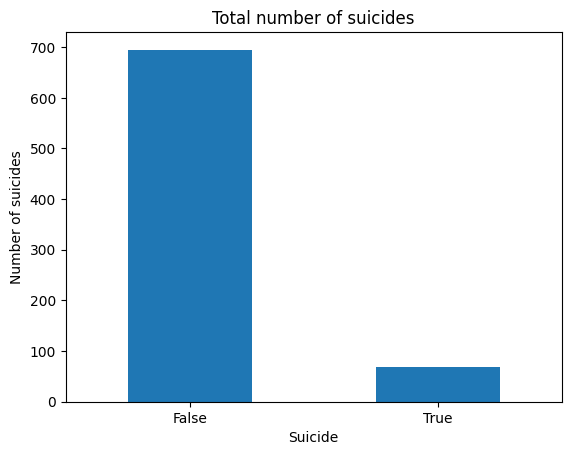

In [25]:
Suicidedf.suicidal.value_counts().plot(kind="bar")
plt.title("Total number of suicides")
plt.xlabel("Suicide")
plt.xticks(rotation=0)
# addlabels(Suicidedf['suicidal'],Suicidedf.suicidal.value_counts(normalize = True))
plt.ylabel("Number of suicides")
plt.show()

*There happened to be only 8.5% of suicide rate that has occured*





> **3.1   Correlation of variables with suicidal column**













*Uisng correlation we can find the variables that is more related to the output variable, suicidal. For this we are plotting the correlation between eachvariable to the output variable*

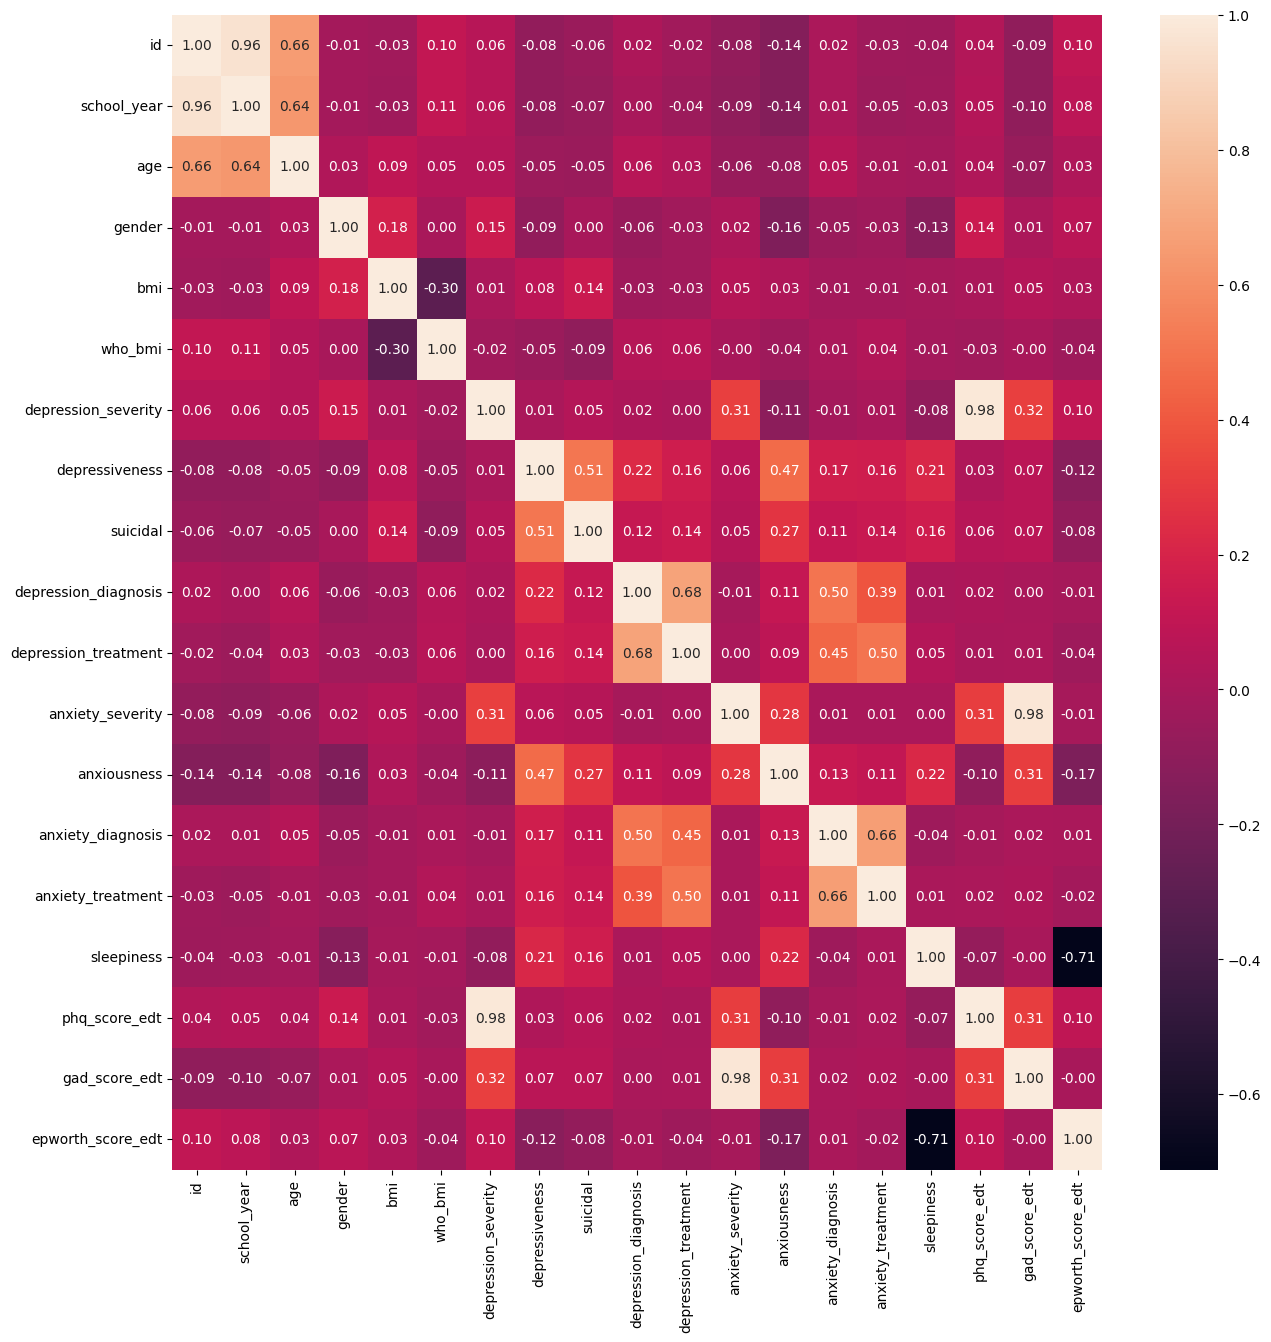

In [26]:
corr = Suicidedf.corr()

# plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr,
            annot=True,
            annot_kws={'size': 10},
            fmt='.2f',
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

In [27]:
Suicidedf.corrwith(Suicidedf['suicidal'])

id                     -0.055365
school_year            -0.069824
age                    -0.054151
gender                  0.000229
bmi                     0.140890
who_bmi                -0.092674
depression_severity     0.045416
depressiveness          0.510948
suicidal                1.000000
depression_diagnosis    0.118755
depression_treatment    0.138569
anxiety_severity        0.050439
anxiousness             0.271599
anxiety_diagnosis       0.111323
anxiety_treatment       0.135920
sleepiness              0.162219
phq_score_edt           0.057243
gad_score_edt           0.072815
epworth_score_edt      -0.079609
dtype: float64

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Figure size 640x480 with 0 Axes>

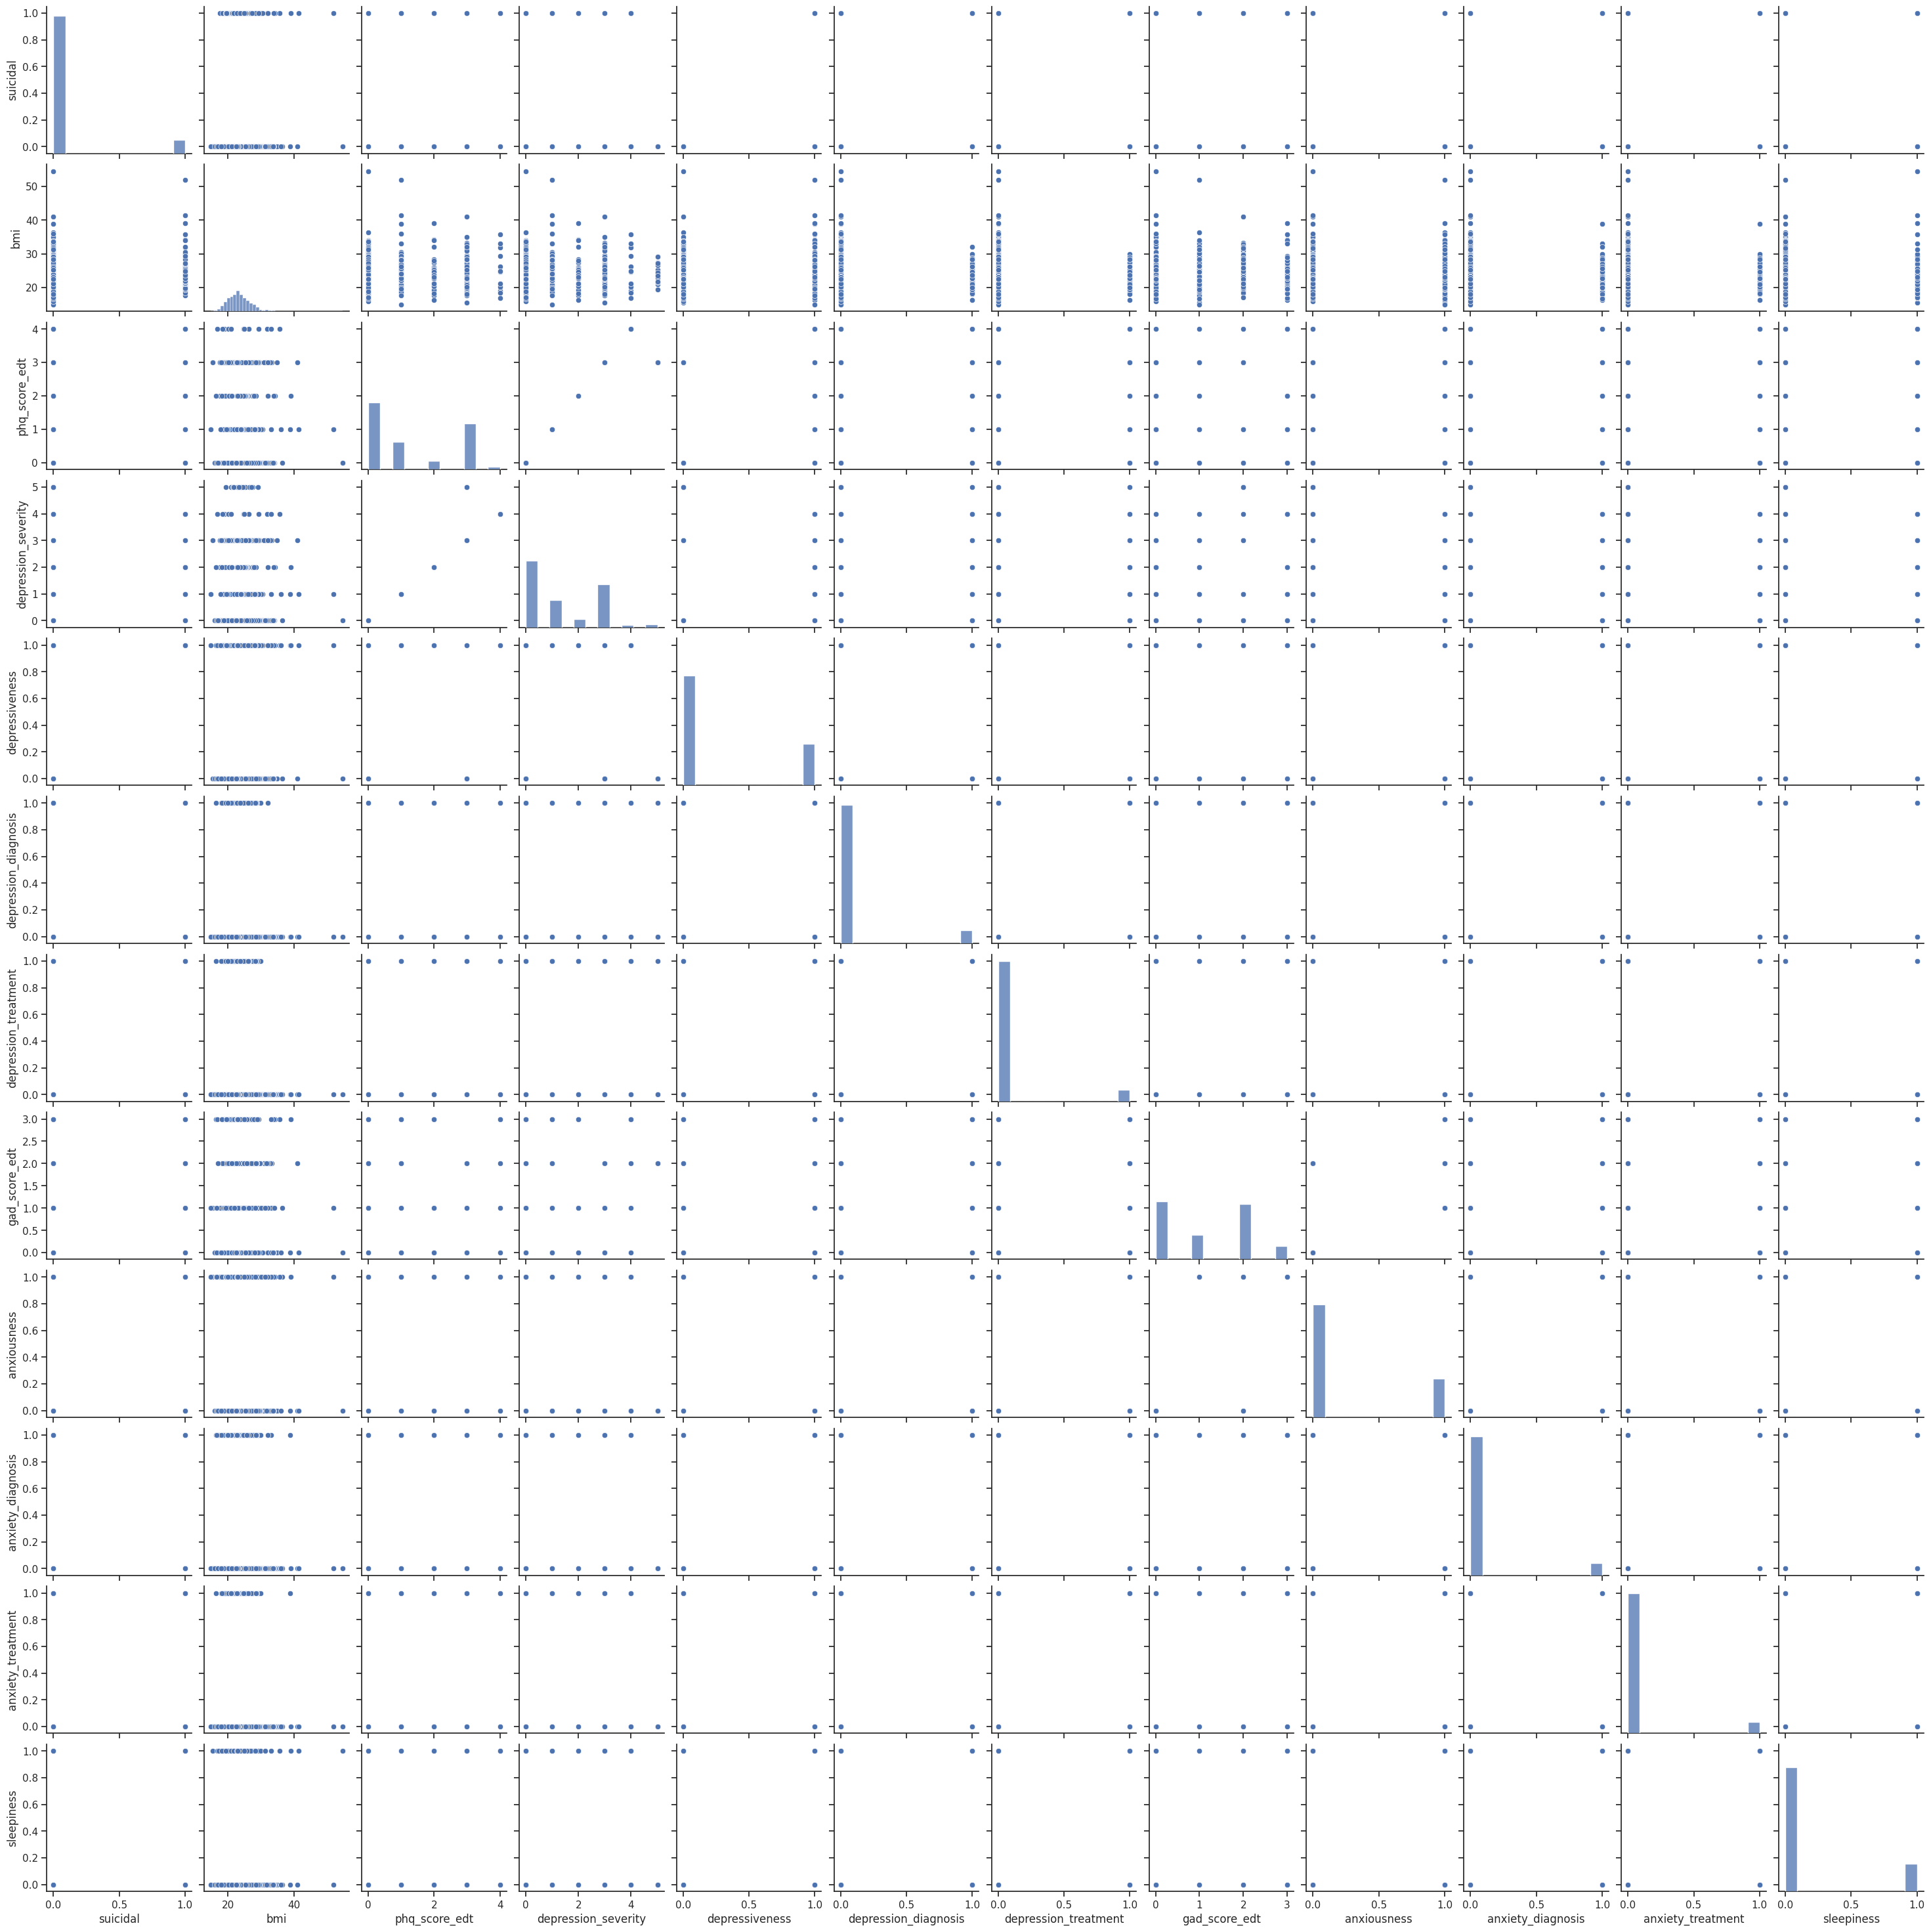

In [28]:
#Plotting the relationship between different variables that has positive correlation with suicidal
sns.set(style="ticks", color_codes=True)  
plt.figure()  
df = Suicidedf[['suicidal','bmi','phq_score_edt','depression_severity','depressiveness','depression_diagnosis','depression_treatment','gad_score_edt','anxiousness','anxiety_diagnosis','anxiety_treatment','sleepiness']]
g = sns.pairplot(df)
plt.show()

*From the above result of correlation, we can take all the variables with positive correlation as inputs*





> **3.2   Deciding the input and output variables**













In [29]:
#input dataset
input = Suicidedf[['bmi','phq_score_edt','depression_severity','depressiveness','depression_diagnosis','depression_treatment','gad_score_edt','anxiousness','anxiety_diagnosis','anxiety_treatment','sleepiness']].values

In [30]:
#output dataset
output = Suicidedf[['suicidal']].values

In [31]:
#Splitting data as train and test at 70% and 30% respectively
input_train, input_test, output_train, output_test = train_test_split( input, output, test_size=0.3,random_state = 10)

## **Step 4:** Model building





## **4.1   Decision Tree**













*It is a hierarchical model that uses tree-like structure of decisions*





> **4.1.1   Modeling**













*Creating an instance of decision tree called DecisionTree*

In [32]:
DecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [33]:
#Fitting the train data to the model for training
DecisionTree.fit(input_train,output_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)





> **4.1.2   Prediction**













In [34]:
#Predicting the output of the testing dataset
predTree = DecisionTree.predict(input_test)





> **4.1.3   Evaluation**













In [35]:
#Finding the accuracy between the actual and observed output
output_accuracy_dt = metrics.accuracy_score(output_test, predTree)
print("Test set Accuracy (Decision Tree):" , output_accuracy_dt)

Test set Accuracy (Decision Tree): 0.9388646288209607


*Accuracy of the dataset is 92.5% using decision tree classifier at random state 10*





###  **4.2   K nearest neighbour**














*It is a model that predicts the outpput using the features of it's neighbors*





> **4.2.1   Modeling**













*Creating an instance of K nearest neighbour as Knn*

In [36]:
#Let's check for k from 1 to 10
Ks = 10
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    Knn = KNeighborsClassifier(n_neighbors = n).fit(input_train,output_train)
    output_predict = Knn.predict(input_test)
    mean_acc[n-1] = metrics.accuracy_score(output_test, output_predict)

    print("Test set Accuracy (K nearest Neighbour): for" ,n,'=', mean_acc[[n-1]])
mean_acc

Test set Accuracy (K nearest Neighbour): for 1 = [0.91266376]
Test set Accuracy (K nearest Neighbour): for 2 = [0.92139738]
Test set Accuracy (K nearest Neighbour): for 3 = [0.91703057]
Test set Accuracy (K nearest Neighbour): for 4 = [0.91703057]
Test set Accuracy (K nearest Neighbour): for 5 = [0.90829694]
Test set Accuracy (K nearest Neighbour): for 6 = [0.91703057]
Test set Accuracy (K nearest Neighbour): for 7 = [0.91703057]
Test set Accuracy (K nearest Neighbour): for 8 = [0.91703057]
Test set Accuracy (K nearest Neighbour): for 9 = [0.91703057]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

array([0.91266376, 0.92139738, 0.91703057, 0.91703057, 0.90829694,
       0.91703057, 0.91703057, 0.91703057, 0.91703057])

*Since k=2 has the highest accuracy , here we take k=2*

In [37]:
#Train Model and Predict  
Knn = KNeighborsClassifier(n_neighbors = 2).fit(input_train,output_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)






> **4.2.2   Prediction**













In [38]:
output_predict = Knn.predict(input_test)





> **4.2.3   Evaluation**













In [39]:
output_accuracy_knn = metrics.accuracy_score(output_test,output_predict)
print("Test set Accuracy (K-Nearest Neighbour): " , output_accuracy_knn)

Test set Accuracy (K-Nearest Neighbour):  0.9213973799126638


*K nearest neighbour gaves an accuracy of 90.7% for k=2*





###  **4.3   Logistic regression**













*This model is mainly used to predict the categorical dependent variable*





> **4.3.1   Modeling**













*Creating an instance of Logistic regression as LR*

In [40]:
LR = LogisticRegression().fit(input_train,output_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(






> **4.3.2   Prediction**













In [41]:
output_predict = LR.predict(input_test)





> **4.2.3   Evaluation**













In [42]:
output_accuracy_LR = metrics.accuracy_score(output_test,output_predict)
print("Test set Accuracy (Logistic regression): " , output_accuracy_LR)

Test set Accuracy (Logistic regression):  0.925764192139738


*Logistic regression gaves an accuracy of 91.6%*





###  **4.4   Support vector machine**

















> **4.4.1   Modeling**













*Creating an instance of support vector machine as svc*

In [43]:
svc = svm.SVC(kernel='rbf')
svc.fit(input_train, output_train) 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()





> **4.4.2   Prediction**













In [44]:
output_predict = svc.predict(input_test)





> **4.4.3   Evaluation**













In [45]:
output_accuracy_SVM = metrics.accuracy_score(output_test,output_predict)
print("Test set Accuracy (Support vector machine): " , output_accuracy_SVM)

Test set Accuracy (Support vector machine):  0.9170305676855895


*Support vector machine gaves an accuracy of 91.2%*





###  **4.5   Artificial neural network**













In [46]:
#Converting inpput and output inorder to avoid conflict
input = input.astype(int)
output = output.astype(int)
input_train, input_test, output_train, output_test = train_test_split( input, output, test_size=0.3,random_state = 10)





> **4.5.1   Initialising ANN**













*Initialising ANN as sequence of layers*

In [47]:
ann = tf.keras.models.Sequential()

In [48]:
#Adding input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [49]:
#Adding second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [50]:
#Adding output layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))





> **4.5.1   Training the model**













In [51]:
#Compiling the ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [52]:
#Fitting ANN
ann.fit(input_train,output_train,batch_size=32,epochs = 200)

Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.4806 - accuracy: 0.9082
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.9082
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.9082
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.9082
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.9082
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.9082
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.9082
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.9082
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.9082
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.9082
Epoch 11/





> **4.5.2   Prediction**













In [53]:
output_pred=ann.predict(input_test)
output_pred=(output_pred>0.5)
output_pred

8/8 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [





> **4.5.3   Evaluation**













In [54]:
output_accuracy_ANN = metrics.accuracy_score(output_test,output_pred)
print("Test set Accuracy (Artificial neural network): " , output_accuracy_ANN)

Test set Accuracy (Artificial neural network):  0.9170305676855895


*There is an accuracy of 90.3% while using Artificial neural network model*

## **Analysis**

In [55]:
#The accuracy of different models have been combined together in a dataframe
data = {'S.No.':[1,2,3,4,5],
        'Model Name':['Decision Tree','K nearest Neighbour','Logistic regression','Support Vector Machine','Artificial Neural Network'],
        'Accuracy':[output_accuracy_dt, output_accuracy_knn, output_accuracy_LR, output_accuracy_SVM, output_accuracy_ANN]}
analysisdf = pd.DataFrame(data = data)
analysisdf

,S.No.,Model Name,Accuracy
0,1,Decision Tree,0.938865
1,2,K nearest Neighbour,0.921397
2,3,Logistic regression,0.925764
3,4,Support Vector Machine,0.917031
4,5,Artificial Neural Network,0.917031


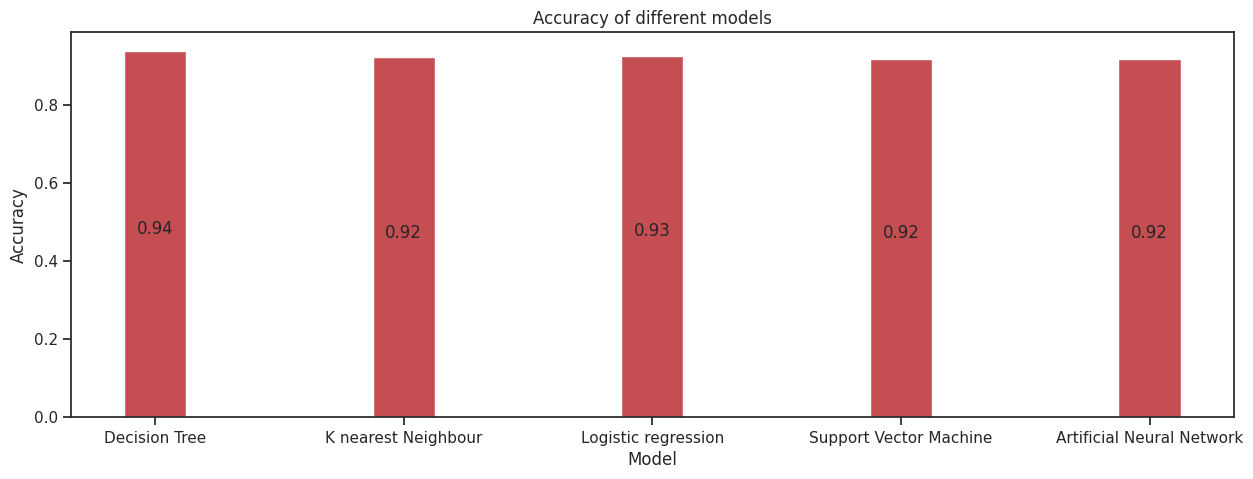

In [56]:
#Plot the accuracy of different models
#Function to add label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, y[i], ha = 'center')

plt.figure(figsize = (15,5))
plt.bar(analysisdf['Model Name'], analysisdf['Accuracy'], width = 0.25, color = 'r')
plt.title('Accuracy of different models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
addlabels(analysisdf['Model Name'], round(analysisdf['Accuracy'],2))
plt.show()

***From the above Bar plot it is clear that Decision Tree gives us highest accuracy of 93%, whereas, Artificial neural network gives an accuracy of 90% which is least. So, we can confirm that for the data of depression and anxiety it is better to use the model Decision tree to find the suicide rate.***